# ***Import Libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from typing import List, Tuple, Callable
from data_augmentation import Geometric_Augmentations
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import Tensor

In [3]:
PATH = './DataSet/Fish_Dataset'
labels = [entry.name for entry in os.scandir(PATH) if entry.is_dir()]
labels

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [4]:
fish_id = [id.name for id in os.scandir(f'{PATH}/{labels[0]}/{labels[0]}')]
fish_id

['00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '00071.png',
 '0007

In [29]:
def plot_image(image_path: str, mask_path:str, scale:float = 1.3) -> None:
    """
    Display an image from the given file path using OpenCV and Matplotlib.

    Args:
        image_path (str): The path to the image file.
        mask_path (str): The path to the mask file.
        scale (float): Scaling factor for the figure size (default is 1.3).

    Returns:
        None

    Raises:
        FileNotFoundError: If the image or mask file is not found.
        Exception: If there is an issue loading the image or mask.
    """
    try:
        # Load the image and mask
        image = plt.imread(image_path)
        mask = plt.imread(mask_path)
    except FileNotFoundError as e:
        raise FileNotFoundError(f"File not found: {str(e)}")
    except Exception as e:
        raise Exception(f"An error occurred while loading the image or mask: {str(e)}")
    
    # Adjust the figure size based on the scale parameter
    fig_width, fig_height = plt.gcf().get_size_inches()
    plt.figure(figsize=(fig_width * scale, fig_height * scale))

    # Create a subplot with two columns for the image and mask
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    plt.axis('off')

    plt.show()


In [6]:
def get_images_path(base_path: str, labels_list: List[str], ids_list: List[str]) -> Tuple[List[str], List[str], List[str]]:
    """
    Generate lists of image and mask file paths along with corresponding labels.

    Args:
        base_path (str): The base directory containing subdirectories for labels.
        labels_list (List[str]): List of label names (directory names).
        ids_list (List[str]): List of image file names within each label directory.

    Returns:
        Tuple[List[str], List[str], List[str]]: A tuple containing lists of image file paths,
        mask file paths, and corresponding labels.
    """
    images_path = []
    masks_path = []
    labels = []

    for label in labels_list:
        for id in ids_list:
            image_path = f"{base_path}/{label}/{label}/{id}"
            mask_path = f"{base_path}/{label}/{label} GT/{id}"
            
            images_path.append(image_path)
            masks_path.append(mask_path)
            labels.append(label)

    return images_path, masks_path, labels

In [7]:
images_path, masks_path, labels = get_images_path(PATH, labels, fish_id)

data = {
    'label': labels,
    'image_path': images_path,
    'mask_path': masks_path
}

dataframe = pd.DataFrame(data)


In [8]:
display(dataframe)

,label,image_path,mask_path
0,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
1,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
2,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
3,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
4,Black Sea Sprat,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...,./DataSet/Fish_Dataset/Black Sea Sprat/Black S...
...,...,...,...
8995,Trout,./DataSet/Fish_Dataset/Trout/Trout/00996.png,./DataSet/Fish_Dataset/Trout/Trout GT/00996.png
8996,Trout,./DataSet/Fish_Dataset/Trout/Trout/00997.png,./DataSet/Fish_Dataset/Trout/Trout GT/00997.png
8997,Trout,./DataSet/Fish_Dataset/Trout/Trout/00998.png,./DataSet/Fish_Dataset/Trout/Trout GT/00998.png
8998,Trout,./DataSet/Fish_Dataset/Trout/Trout/00999.png,./DataSet/Fish_Dataset/Trout/Trout GT/00999.png


<Figure size 640x480 with 0 Axes>

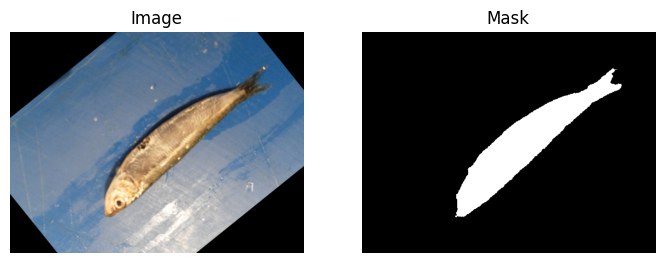

In [30]:
i = 10
image_path = dataframe.loc[10, 'image_path']
mask_path = dataframe.loc[10, 'mask_path']
plot_image(image_path, mask_path)

In [10]:
target_size = [256,256]

In [11]:
def preprocess_image_and_mask(image_path: str, mask_path: str, target_size: tuple) -> Tuple[Tensor, Tensor]:
    """
    Preprocess an image and its corresponding mask for a segmentation task.

    Args:
        image_path (str): Path to the input image file.
        mask_path (str): Path to the mask image file.
        target_size (tuple): A tuple (height, width) specifying the target size for resizing.

    Returns:
        Tuple[Tensor, Tensor]: A tuple containing preprocessed image and mask tensors.
            - Preprocessed image tensor with shape (height, width, 3).
            - Preprocessed mask tensor with shape (height, width, 1).
    """
    
    # Read and decode the input image
    image_data = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image_data, channels=3)

    # Read and decode the mask image
    mask_data = tf.io.read_file(mask_path)
    mask = tf.image.decode_jpeg(mask_data, channels=1)

    # Resize the image and mask to the target size
    image = tf.image.resize(image, target_size)
    mask = tf.image.resize(mask, target_size)

    # Normalize the image to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0

    # Binarize the mask
    mask = tf.math.sign(mask)

    return image, mask


In [12]:
def create_dataset(dataframe: pd.DataFrame,
                   preprocess_functions: Callable[[str, str, Tuple[int, int]], Tuple[tf.Tensor, tf.Tensor]],
                   data_augmentation_funciton: Callable[[tf.Tensor, tf.Tensor, float], Tuple[tf.Tensor, tf.Tensor]],
                   train: bool = False) -> tf.data.Dataset:
    """
    Create a TensorFlow dataset for image segmentation tasks.

    Args:
        dataframe (pd.DataFrame): A pandas DataFrame with columns 'image_path' and 'mask_path' containing file paths.
        preprocess_functions (callable): A function for preprocessing image and mask pairs.
        data_augmentation_funciton (callable): A function for data augmentation.
            This function will be applied to the dataset elements.
        train (bool, optional): Whether to apply data augmentation for training.

    Returns:
        tf.data.Dataset: A TensorFlow dataset containing preprocessed image and mask pairs.
    """
    
    # Extract image and mask file paths from the DataFrame
    image_paths = dataframe["image_path"].values
    mask_paths = dataframe["mask_path"].values

    # Create a dataset of image and mask file paths
    df = tf.data.Dataset.from_tensor_slices((image_paths, mask_paths))

    # Map the preprocessing function to each element and optimize parallelism
    df = df.map(lambda image_path, mask_path: preprocess_image_and_mask(image_path, mask_path, target_size), num_parallel_calls=tf.data.AUTOTUNE)

    # Apply data augmentation for training dataset
    if train:
        df = df.map(lambda image_path, mask_path:data_augmentation_funciton(image_path, mask_path), num_parallel_calls=tf.data.AUTOTUNE)

    return df


In [22]:
data = dataframe[['image_path', 'mask_path']]
target = dataframe['label']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train = create_dataset(x_train, preprocess_image_and_mask, Geometric_Augmentations.horizontal_flip, train=True)
x_validation = create_dataset(x_validation, preprocess_image_and_mask, Geometric_Augmentations.horizontal_flip)
x_test = create_dataset(x_test, preprocess_image_and_mask, Geometric_Augmentations.horizontal_flip)